# Demo on how to explore the data from Mecury

### Import the necessary modules and data

In [1]:
import numpy as np
import scipy as sp
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
inittotal,endtotal,nsteptotal,npstatustotal,npcount,necount=pickle.load(open('data/runsummary_Exp2.pkl',mode='r'))

/Users/chelsea/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


runsummary_Exp2.pkl is a pickled dump of the entire result from the experiment run2. It is generated by the script collect.py. The content 
of this file is as the following:

- #### initotal stores all the initial conditions
- #### endtotal stores all the end conditions
- #### nsteptotal stores how many steps each planet has in runs
- #### npstatustotal stores the end status of each run
- #### npcount stores the number of survived planets in the system
- #### necount stores the number of survived super earths in the system
Let's examine the dimension of the arrays to get familar with them. This example is with 150 runs and 6 planets, there are 8 elements for the init/end conditions: 
Time, a, e, i, peri, node, M, mass

In [2]:
print inittotal.shape 
print endtotal.shape
print nsteptotal.shape
print npstatustotal.shape
print npcount.shape
print necount.shape

(200, 6, 8)
(200, 6, 8)
(200, 6)
(200, 6)
(200,)
(200,)


We first try to introduce a plotting function that hopefully is flexible enough to examine the correlation of any two variables. This would idealy 
be in a script, and then we import it to use in the notebook.

In [12]:
#plotting function 
def plot_scatter(dataarr,param1,param2,xlim=[],ylim=[],color=''):
    #this dictionary sets the array format by default.
    paramdic={"a":1,"e":2,"i":3,"peri":4,"node":5,"M":6,"mass":7}
    index1=paramdic[param1]
    index2=paramdic[param2]
    fig=plt.figure(figsize=[9,5])
    ax=fig.add_subplot(111)
    
    try:
        cax=ax.plot(dataarr[:,:,index1],dataarr[:,:,index2],'.')
    except IndexError:
        #we allow user to use one of the collums to color code the scatter.
        if not color=='':
            if type(color) is str:
                cax=ax.scatter(dataarr[:,index1],dataarr[:,index2],c=dataarr[:,paramdic[color]], cmap='hot')
            else:
                cax=ax.scatter(dataarr[:,index1],dataarr[:,index2],c=color, cmap='hot')
        else:
            cax=ax.plot(dataarr[:,index1],dataarr[:,index2],'.')
    ax.set_xlabel(param1)
    ax.set_ylabel(param2)
    if len(xlim)>0:
        ax.set_xlim(xlim)
    if len(ylim)>0:
        ax.set_ylim(ylim)
    try:
        cbar = fig.colorbar(cax,shrink=0.5,aspect=10,pad=0.05)
    except AttributeError:
        fig.legend(cax,tuple(np.arange(1,7).astype(str)),bbox_to_anchor=(0.8,0.75),borderpad=2.5)
        
    plt.show()
    return

Let's take a look at the initial condition.

Note this is autometically color coded by the planet number. 

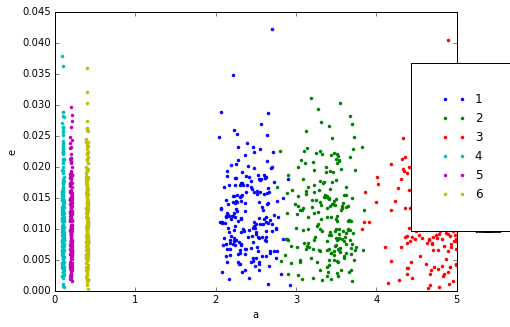

In [13]:
plot_scatter(inittotal,"a","e")

Let's also examine the end result. Since there are lots of planets get rejected or collided with the star, we should make sure to reset the axis limit. 

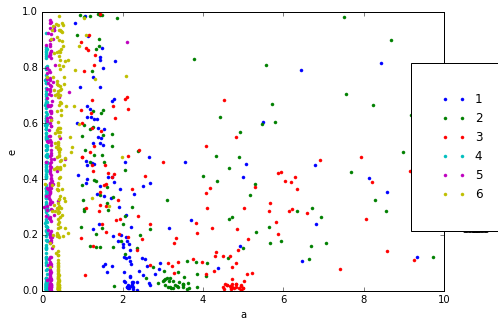

In [14]:
plot_scatter(endtotal,"a","e",xlim=[0,10],ylim=[0,1])

What's more interesting is the end result of all the **survived systems**, we use mass to color code the planets instead this time. 

The survived systems are marked with flag 0 in npstatustotal. 

The codes are: 

0-survive

1-collision

2-eject

3-star

(200, 6)
(574, 8)


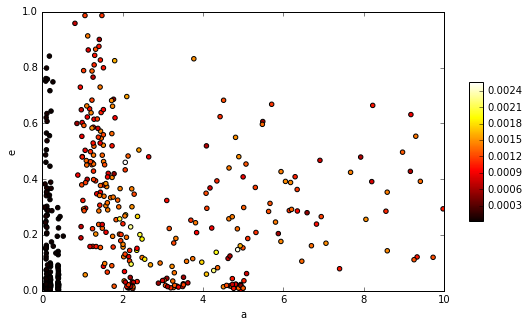

In [15]:
survive=npstatustotal==0
print survive.shape
print endtotal[survive,:].shape
plot_scatter(endtotal[survive,:],"a","e",xlim=[0,10],ylim=[0,1],color="mass")


Or only the systems with **superearths survive**. 

necount record the number of survived super earth in the system.

There are two selection steps in the below routine, since we want to plot only the survived planets in the systems with super earths remain.

(85, 6)
(356, 8)


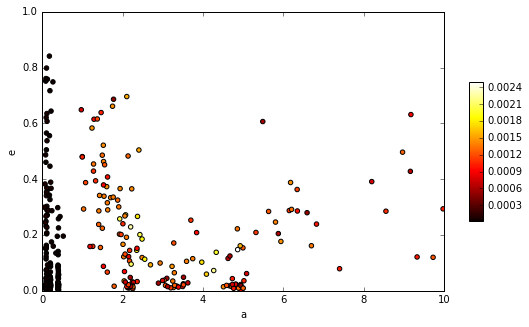

In [16]:
SEsys=necount>0
survive=npstatustotal[SEsys,:]==0
print survive.shape
print endtotal[SEsys,:,:][survive,:].shape
plot_scatter(endtotal[SEsys,:,:][survive,:],"a","e",xlim=[0,10],ylim=[0,1],color="mass")

## Explore the multiplicity of the systems

We start with using histograms to demonstrate the different populations in the end result.

In [17]:
def plot_hist(ncount):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    bins=np.arange(0,8)-0.5
    n,bins,patches=ax.hist(ncount,bins=bins,rwidth=0.5)
    print n, bins
    plt.show()
    return

Histogram of number of planets survived in the system
[  0.   2.  83.  54.   8.  22.  17.] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


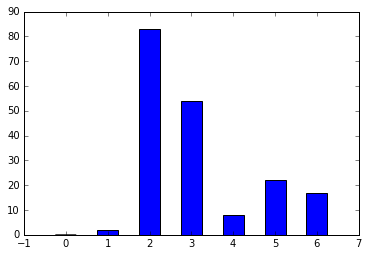

In [18]:
print "Histogram of number of planets survived in the system"
plot_hist(npcount)

Histogram of number of super earths survived in the system
[ 101.   38.    9.   38.    0.    0.    0.] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


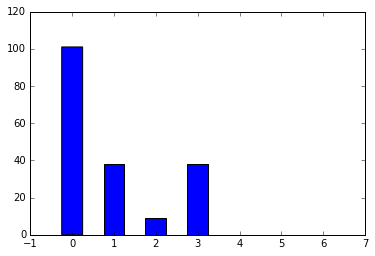

In [19]:
print "Histogram of number of super earths survived in the system"
plot_hist(necount)

Let's do our scatter plot again, but try to color code this with multiplicities.


/Users/chelsea/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8 but corresponding boolean dimension is 6
  app.launch_new_instance()
/Users/chelsea/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(200, 8)


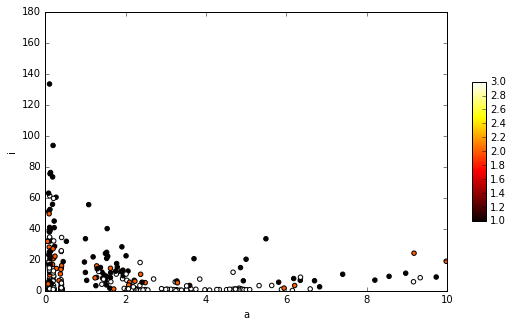

In [20]:
necount_all=np.rollaxis(np.tile(necount,(8,1)),-1)
print necount_all.shape
plot_scatter(endtotal[SEsys,:,:][survive,:],"a","i",xlim=[0,10],ylim=[0,180],color=necount_all[SEsys,:][survive])

## Explore the mutual inclination of the systems.